In [149]:
# Libraries
import pandas as pd #Untuk melakukan proses pada data
import numpy as np #mengelola komputasi matrix/numerik
import re #reguler expression untuk proses cleansing
import matplotlib.pyplot as plt #persentasi data berupa grafik/plot
import string 
import nltk
import pickle 
from nltk.corpus import stopwords
from nltk import word_tokenize

In [150]:
data = pd.read_csv('C:/Users/sinag/SKRIPSIKU/preprocessing.csv', sep = ',', encoding ='utf-8')
data.head()

,id,username,text,sentimen,label
0,1,akhmad Zubaeri,repot orang miskin kerjanya serabutan,negatif,-1
1,2,Amin Udin,setiap desa kasih relawan alat tes pak semua t...,positif,1
2,3,Amin Udin,kesadaran masyarakat rendah salahkan malah pem...,negatif,-1
3,4,Amin Udin,semangat pak jokowi,netral,0
4,5,Amin Udin,ingin hidup normal,netral,0


In [151]:
data.shape

(4011, 5)

In [152]:
data['sentimen'].value_counts()

negatif    2322
positif     906
netral      783
Name: sentimen, dtype: int64

In [153]:
nan_rows = data[data['sentimen'].isnull()]
print(nan_rows)

Empty DataFrame
Columns: [id, username, text, sentimen, label]
Index: []


In [154]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tf_idf = tfidf.fit_transform(data['text'].astype('U'))

In [16]:
# menyimpan model TF-IDF
import pickle

with open('tfidf.pickle', 'wb') as r:
    pickle.dump(tfidf,r)

In [29]:
with open('tfidf.pickle', 'rb') as r:
    tf_idf = pickle.load(r)

In [23]:
df.to_csv('C:/Users/sinag/SKRIPSIKU/tf_idf.csv', index=False)
tf_idf = pd.read_csv('C:/Users/sinag/SKRIPSIKU/tf_idf.csv', encoding='latin1')

In [155]:
# splitting data latih 80 : uji 20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf, data['label'], test_size=0.2, random_state=5)

In [188]:
# Decision Tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = tree.DecisionTreeClassifier()
#lakukan prediksi pada data test
clf.fit(X_train, y_train)
dt = clf.predict(X_test)

print("Accuracy : ", round(accuracy_score(dt, y_test)*100,3))
print("Precision : ", round(precision_score(dt, y_test, average = 'macro')*100,3))
print("Recall : ", round(recall_score(dt, y_test, average = 'macro')*100,3))
print("\n")
# Confusion Matrix
print("Confusion Matrix for Decision Tree Classifier:")
cm = confusion_matrix(y_test,dt)
print(cm)
print("\n")
print("Classification Report:")
print(classification_report(dt,y_test))

Accuracy :  98.506
Precision :  97.976
Recall :  98.585


Confusion Matrix for Decision Tree Classifier:
[[444   0   3]
 [  3 147   3]
 [  3   0 200]]


Classification Report:
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       450
           0       0.96      1.00      0.98       147
           1       0.99      0.97      0.98       206

    accuracy                           0.99       803
   macro avg       0.98      0.99      0.98       803
weighted avg       0.99      0.99      0.99       803



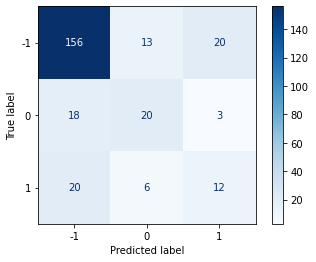

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.show()

In [75]:
# menyimpan model decision tree
import pickle

with open('DT.pickle', 'wb') as r:
    pickle.dump(clf,r)

In [76]:
# load model
with open('DT.pickle', 'rb') as r:
    dtp = pickle.load(r)

In [35]:
#cek data pickle file
dt = dtp.predict(X_test)
round(accuracy_score(y_test,dt)*100,3)

74.254

In [96]:
dt=pd.DataFrame({'Actual':y_test, 'Predicted':dt})
dt.head(10)

,Actual,Predicted
299,negatif,negatif
802,negatif,negatif
51,netral,negatif
399,negatif,negatif
370,netral,netral
269,negatif,negatif
1319,negatif,negatif
1047,negatif,netral
636,negatif,negatif
312,negatif,negatif


In [97]:
dt.to_csv('C:/Users/sinag/SKRIPSIKU/sentimen_DT.csv', index=False)
data = pd.read_csv('C:/Users/sinag/SKRIPSIKU/sentimen_DT.csv', encoding='latin1')
data.head()

,Actual,Predicted
0,negatif,negatif
1,negatif,negatif
2,netral,negatif
3,negatif,negatif
4,netral,netral
